***Edi Tomas  201503783***

Se realizo un test en base a un archivo ya existente de los numeros de covid  para este caso, se uso un algoritmo  ***Cross decomposition*** para ver las comparaciones y el comportamiento de las dos graficas.






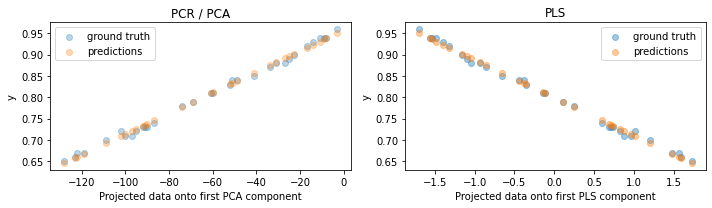

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import numpy as np
#from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd



# cargar el csv desde github mediante pandas
url = 'https://raw.githubusercontent.com/luisespino/artificial_intelligence/master/machine_learning_scikit_learn/pa.csv'
df = pd.read_csv(url)

# establecer los datos de entrenamiento
X = np.asarray(df['ciclomes']).reshape(-1,1)
y = df['pa']




#X = np.array([1.50, 1.52, 1.60, 1.70, 1.80,1.90,2.00]).reshape(-1, 1)
#y = np.array([148, 170, 180, 190, 200,201,175])
rng = np.random.RandomState(0) #  Numero de comportamiento de la graica 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

#PCA
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline
#PLS
pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.4, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.4, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()